In [20]:
import os
import sys
import importlib
if '../utils' not in sys.path:
    sys.path.insert(0,'../utils')
import lmp
import lmpsetup
import analysis
import numpy as np
import matplotlib.pyplot as plt

importlib.reload(lmp);
importlib.reload(lmpsetup);
importlib.reload(analysis);

In [14]:
D12_bd = '/home/adria/perdiux/prod/lammps/dignon/12D_CPEB4'
D7_bd = '/home/adria/perdiux/prod/lammps/dignon/7D_CPEB4'
m4_bd = '/home/adria/perdiux/prod/lammps/dignon/CPEB4_D4'

dirs = ['0.8ls-10I-80e', '0.8ls-400I-80e', '1.0ls-10I-10e', '1.0ls-400I-10e', '1.0ls-10I-80e', '1.0ls-400I-80e']
#################LEGEND FOR REFERENCE#################
trans = [[0.8, 10e-3, 80], [0.8, 400e-3, 80], [1.0, 10e-3, 10], [1.0, 400e-3, 10], [1.0, 10e-3, 80], [1.0, 400e-3, 80]]
######################################################
storer = {"12D":{}, "7D":{}, "D4":{}}

In [80]:
for i, d in enumerate(dirs):
    D12 = analysis.Analysis(oliba_wd=os.path.join(D12_bd, d), temper=True)
    storer["12D"][i] = {}
    st = storer["12D"][i]
    st["contacts"] = D12.contact_map(use='md')
    st["ijs"] = D12.ij_from_contacts(use='md', contacts=st["contacts"])
    st["florys"] = D12.flory_scaling_fit(use='md', r0=5.5, ijs=st["ijs"])
    st["rg"] = D12.rg(use='md')

Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)


In [81]:
for i, d in enumerate(dirs):
    D7 = analysis.Analysis(oliba_wd=os.path.join(D7_bd, d), temper=True)
    storer["7D"][i] = {}
    st = storer["7D"][i]
    st["contacts"] = D7.contact_map(use='md')
    st["ijs"] = D7.ij_from_contacts(use='md', contacts=st["contacts"])
    st["florys"] = D7.flory_scaling_fit(use='md', r0=5.5, ijs=st["ijs"])
    st["rg"] = D7.rg(use='md')

Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)


In [82]:
for i, d in enumerate(dirs):
    D4 = analysis.Analysis(oliba_wd=os.path.join(m4_bd, d), temper=True)
    storer["D4"][i] = {}
    st = storer["D4"][i]
    st["contacts"] = D4.contact_map(use='md')
    st["ijs"] = D4.ij_from_contacts(use='md', contacts=st["contacts"])
    st["florys"] = D4.flory_scaling_fit(use='md', r0=5.5, ijs=st["ijs"])
    st["rg"] = D4.rg(use='md')

Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)
Omitting temper reordering (reorder files already present)


In [83]:
trans = [
    [0.8, 10e-3 , 80], 
    [0.8, 400e-3, 80], 
    [1.0, 10e-3 , 10], 
    [1.0, 400e-3, 10], 
    [1.0, 10e-3 , 80], 
    [1.0, 400e-3, 80]
]
Ts = [150.0, 170.0, 192.5, 217.5, 247.5, 280.0, 320.0, 362.5, 410.0, 467.5, 530.0, 600.0]

# SAME SEQUENCE PLOTS

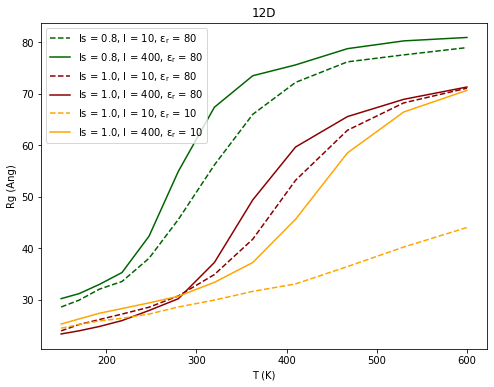

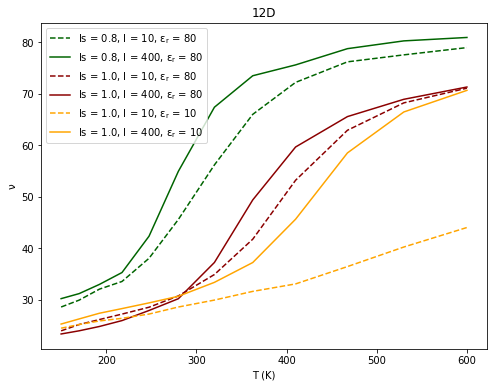

In [84]:
##########################12D###########################

plt.figure(figsize=(8,6))
plt.title("12D")
plt.ylabel("Rg (Ang)")
plt.xlabel("T (K)")
plt.plot(Ts, storer["12D"][0]["rg"].mean(axis=1), '--', color='darkgreen', label="ls = 0.8, I = 10, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["12D"][1]["rg"].mean(axis=1),  color='darkgreen', label="ls = 0.8, I = 400, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["12D"][4]["rg"].mean(axis=1),'--', color='darkred', label="ls = 1.0, I = 10, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["12D"][5]["rg"].mean(axis=1),  color='darkred', label="ls = 1.0, I = 400, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["12D"][2]["rg"].mean(axis=1),'--', color='orange', label="ls = 1.0, I = 10, $\mathregular{ε_r}$ = 10")
plt.plot(Ts, storer["12D"][3]["rg"].mean(axis=1),  color='orange', label="ls = 1.0, I = 400, $\mathregular{ε_r}$ = 10")
plt.legend();

plt.figure(figsize=(8,6))
plt.title("12D")
plt.ylabel("ν")
plt.xlabel("T (K)")
plt.plot(Ts, storer["12D"][0]["rg"].mean(axis=1), '--', color='darkgreen', label="ls = 0.8, I = 10, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["12D"][1]["rg"].mean(axis=1),  color='darkgreen', label="ls = 0.8, I = 400, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["12D"][4]["rg"].mean(axis=1),'--', color='darkred', label="ls = 1.0, I = 10, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["12D"][5]["rg"].mean(axis=1),  color='darkred', label="ls = 1.0, I = 400, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["12D"][2]["rg"].mean(axis=1),'--', color='orange', label="ls = 1.0, I = 10, $\mathregular{ε_r}$ = 10")
plt.plot(Ts, storer["12D"][3]["rg"].mean(axis=1),  color='orange', label="ls = 1.0, I = 400, $\mathregular{ε_r}$ = 10")
plt.legend();

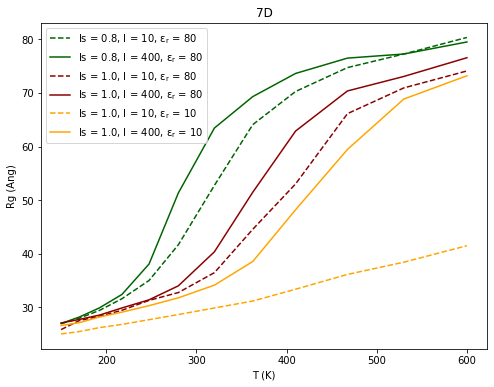

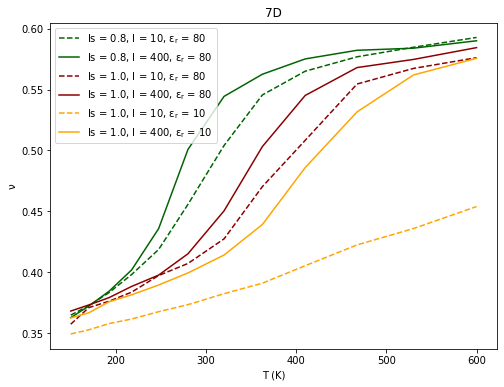

In [85]:
##########################7D###########################

plt.figure(figsize=(8,6))
plt.title("7D")
plt.ylabel("Rg (Ang)")
plt.xlabel("T (K)")
plt.plot(Ts, storer["7D"][0]["rg"].mean(axis=1), '--', color='darkgreen', label="ls = 0.8, I = 10, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["7D"][1]["rg"].mean(axis=1),  color='darkgreen', label="ls = 0.8, I = 400, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["7D"][4]["rg"].mean(axis=1),'--', color='darkred', label="ls = 1.0, I = 10, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["7D"][5]["rg"].mean(axis=1),  color='darkred', label="ls = 1.0, I = 400, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["7D"][2]["rg"].mean(axis=1),'--', color='orange', label="ls = 1.0, I = 10, $\mathregular{ε_r}$ = 10")
plt.plot(Ts, storer["7D"][3]["rg"].mean(axis=1),  color='orange', label="ls = 1.0, I = 400, $\mathregular{ε_r}$ = 10")
plt.legend();

plt.figure(figsize=(8,6))
plt.title("7D")
plt.ylabel("ν")
plt.xlabel("T (K)")
plt.plot(Ts, storer["7D"][0]["florys"][0], '--', color='darkgreen', label="ls = 0.8, I = 10, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["7D"][1]["florys"][0],  color='darkgreen', label="ls = 0.8, I = 400, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["7D"][4]["florys"][0],'--', color='darkred', label="ls = 1.0, I = 10, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["7D"][5]["florys"][0],  color='darkred', label="ls = 1.0, I = 400, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["7D"][2]["florys"][0],'--', color='orange', label="ls = 1.0, I = 10, $\mathregular{ε_r}$ = 10")
plt.plot(Ts, storer["7D"][3]["florys"][0],  color='orange', label="ls = 1.0, I = 400, $\mathregular{ε_r}$ = 10")
plt.legend();

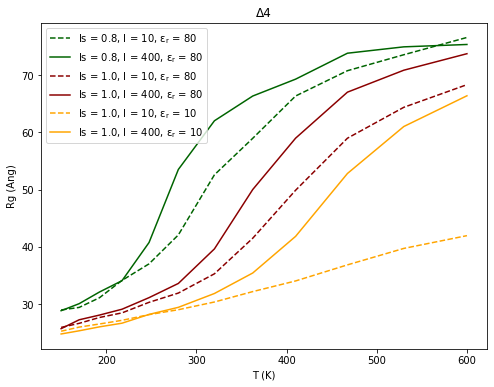

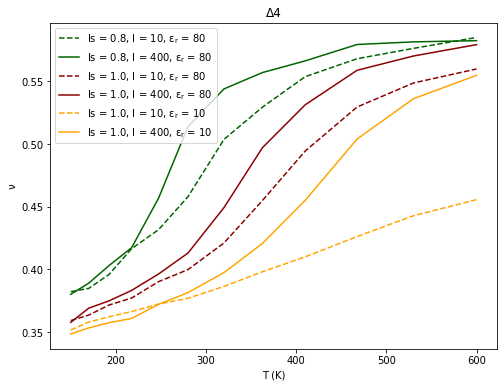

In [86]:
##########################Δ4###########################

plt.figure(figsize=(8,6))
plt.title("Δ4")
plt.ylabel("Rg (Ang)")
plt.xlabel("T (K)")
plt.plot(Ts, storer["D4"][0]["rg"].mean(axis=1), '--', color='darkgreen', label="ls = 0.8, I = 10, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["D4"][1]["rg"].mean(axis=1),  color='darkgreen', label="ls = 0.8, I = 400, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["D4"][4]["rg"].mean(axis=1),'--', color='darkred', label="ls = 1.0, I = 10, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["D4"][5]["rg"].mean(axis=1),  color='darkred', label="ls = 1.0, I = 400, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["D4"][2]["rg"].mean(axis=1),'--', color='orange', label="ls = 1.0, I = 10, $\mathregular{ε_r}$ = 10")
plt.plot(Ts, storer["D4"][3]["rg"].mean(axis=1),  color='orange', label="ls = 1.0, I = 400, $\mathregular{ε_r}$ = 10")
plt.legend();

plt.figure(figsize=(8,6))
plt.title("Δ4")
plt.ylabel("ν")
plt.xlabel("T (K)")
plt.plot(Ts, storer["D4"][0]["florys"][0], '--', color='darkgreen', label="ls = 0.8, I = 10, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["D4"][1]["florys"][0],  color='darkgreen', label="ls = 0.8, I = 400, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["D4"][4]["florys"][0],'--', color='darkred', label="ls = 1.0, I = 10, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["D4"][5]["florys"][0],  color='darkred', label="ls = 1.0, I = 400, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["D4"][2]["florys"][0],'--', color='orange', label="ls = 1.0, I = 10, $\mathregular{ε_r}$ = 10")
plt.plot(Ts, storer["D4"][3]["florys"][0],  color='orange', label="ls = 1.0, I = 400, $\mathregular{ε_r}$ = 10")
plt.legend();

# DIFFERENT SEQUENCES PLTOS

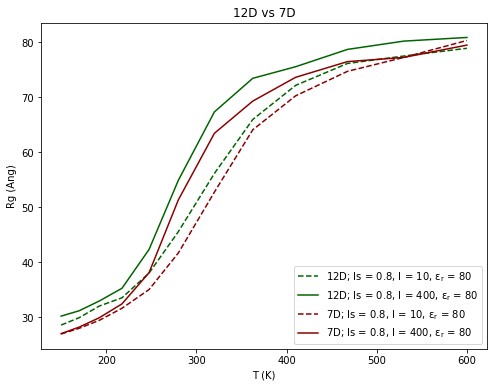

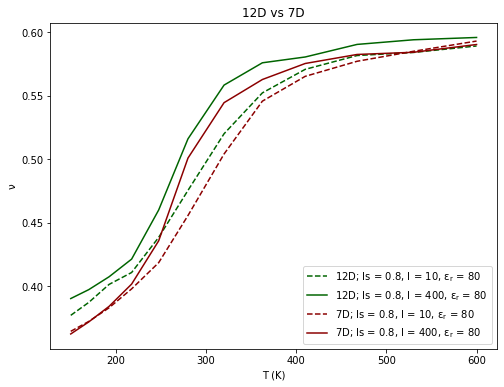

In [100]:
##########################12D vs 7D###########################

plt.figure(figsize=(8,6))
plt.title("12D vs 7D")
plt.ylabel("Rg (Ang)")
plt.xlabel("T (K)")
plt.plot(Ts, storer["12D"][0]["rg"].mean(axis=1), '--', color='darkgreen', label="12D; ls = 0.8, I = 10, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["12D"][1]["rg"].mean(axis=1),  color='darkgreen', label="12D; ls = 0.8, I = 400, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["7D"][0]["rg"].mean(axis=1), '--', color='darkred', label="7D; ls = 0.8, I = 10, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["7D"][1]["rg"].mean(axis=1),  color='darkred', label="7D; ls = 0.8, I = 400, $\mathregular{ε_r}$ = 80")
plt.legend();

plt.figure(figsize=(8,6))
plt.title("12D vs 7D")
plt.ylabel("ν")
plt.xlabel("T (K)")
plt.plot(Ts, storer["12D"][0]["florys"][0], '--', color='darkgreen', label="12D; ls = 0.8, I = 10, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["12D"][1]["florys"][0],  color='darkgreen', label="12D; ls = 0.8, I = 400, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["7D"][0]["florys"][0], '--', color='darkred', label="7D; ls = 0.8, I = 10, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["7D"][1]["florys"][0],  color='darkred', label="7D; ls = 0.8, I = 400, $\mathregular{ε_r}$ = 80")
plt.legend();

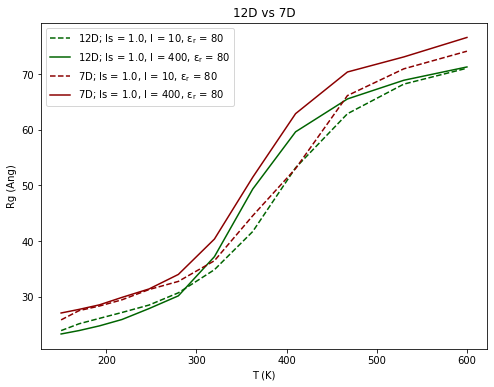

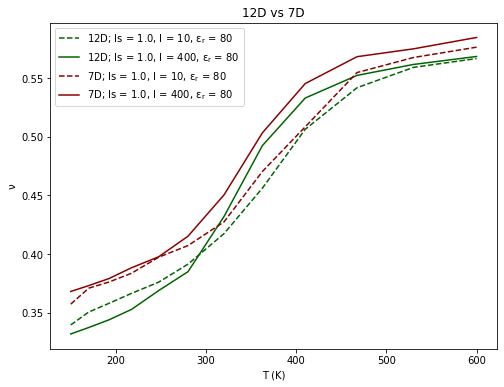

In [101]:
##########################12D vs 7D###########################

plt.figure(figsize=(8,6))
plt.title("12D vs 7D")
plt.ylabel("Rg (Ang)")
plt.xlabel("T (K)")
plt.plot(Ts, storer["12D"][4]["rg"].mean(axis=1),'--', color='darkgreen', label="12D; ls = 1.0, I = 10, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["12D"][5]["rg"].mean(axis=1),  color='darkgreen', label="12D; ls = 1.0, I = 400, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["7D"][4]["rg"].mean(axis=1),'--', color='darkred', label="7D; ls = 1.0, I = 10, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["7D"][5]["rg"].mean(axis=1),  color='darkred', label="7D; ls = 1.0, I = 400, $\mathregular{ε_r}$ = 80")
plt.legend();

plt.figure(figsize=(8,6))
plt.title("12D vs 7D")
plt.ylabel("ν")
plt.xlabel("T (K)")
plt.plot(Ts, storer["12D"][4]["florys"][0],'--', color='darkgreen', label="12D; ls = 1.0, I = 10, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["12D"][5]["florys"][0],  color='darkgreen', label="12D; ls = 1.0, I = 400, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["7D"][4]["florys"][0],'--', color='darkred', label="7D; ls = 1.0, I = 10, $\mathregular{ε_r}$ = 80")
plt.plot(Ts, storer["7D"][5]["florys"][0],  color='darkred', label="7D; ls = 1.0, I = 400, $\mathregular{ε_r}$ = 80")
plt.legend();

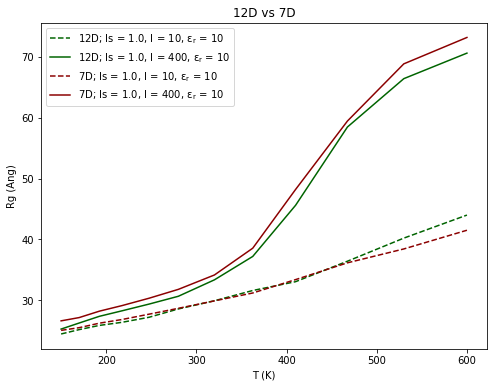

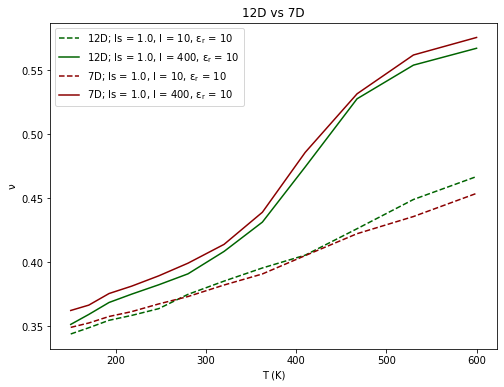

In [102]:
##########################12D vs 7D###########################

plt.figure(figsize=(8,6))
plt.title("12D vs 7D")
plt.ylabel("Rg (Ang)")
plt.xlabel("T (K)")
plt.plot(Ts, storer["12D"][2]["rg"].mean(axis=1),'--', color='darkgreen', label="12D; ls = 1.0, I = 10, $\mathregular{ε_r}$ = 10")
plt.plot(Ts, storer["12D"][3]["rg"].mean(axis=1),  color='darkgreen', label="12D; ls = 1.0, I = 400, $\mathregular{ε_r}$ = 10")
plt.plot(Ts, storer["7D"][2]["rg"].mean(axis=1),'--', color='darkred', label="7D; ls = 1.0, I = 10, $\mathregular{ε_r}$ = 10")
plt.plot(Ts, storer["7D"][3]["rg"].mean(axis=1),  color='darkred', label="7D; ls = 1.0, I = 400, $\mathregular{ε_r}$ = 10")
plt.legend();

plt.figure(figsize=(8,6))
plt.title("12D vs 7D")
plt.ylabel("ν")
plt.xlabel("T (K)")
plt.plot(Ts, storer["12D"][2]["florys"][0],'--', color='darkgreen', label="12D; ls = 1.0, I = 10, $\mathregular{ε_r}$ = 10")
plt.plot(Ts, storer["12D"][3]["florys"][0],  color='darkgreen', label="12D; ls = 1.0, I = 400, $\mathregular{ε_r}$ = 10")
plt.plot(Ts, storer["7D"][2]["florys"][0],'--', color='darkred', label="7D; ls = 1.0, I = 10, $\mathregular{ε_r}$ = 10")
plt.plot(Ts, storer["7D"][3]["florys"][0],  color='darkred', label="7D; ls = 1.0, I = 400, $\mathregular{ε_r}$ = 10")
plt.legend();